# Models: Bag of Words - Results

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn

from pprint import pprint

%matplotlib inline

## Functions

In [402]:
# %load '../snippets/conf_mtx.py'
def conf_mtx(df, t):
    df = pd.concat([(df.sum(axis=1) >= df.shape[1] / 2), t], axis=1)
    df.columns=['y', 't']
    
    pos = df[df['t'] == True]
    neg = df[df['t'] == False]

    tp = (pos['y'] == True).sum()
    fn = (pos['y'] == False).sum()
    fp = (neg['y'] == True).sum()
    tn = (neg['y'] == False).sum()
    
    print('TP:', tp)
    print('FN:', fn)
    print('FP:', fp)
    print('TN:', tn, end='\n\n')

    print('Accuracy:', ((tp + tn) / (tp + fn + fp + tn) * 100).round(dec), end='\n\n')
    
    prec = (tp / (tp + fp))
    rcll = (tp / (tp + fn))
    f1   = 2 * (prec * rcll) / (prec + rcll)

    print('Precision:', prec.round(dec))
    print('Recall:',rcll.round(dec))
    print('F1-score:', f1.round(dec))
    
    return tp, fn, fp, tn

### Settings

In [337]:
cls = ('ET', 'LogReg', 'NB', 'NN', 'RF')

cls_full = (
    'Extra Trees',
    'Logistic Regression',
    'Naïve Bayes',
    'Neural Network',
    'Random Forests'
)

rxs = ('', '_lm', '_sm', '_lm_sm')

rxs_full = (
    'No add. preproc.',
    'Lemmatization',
    'Stemming',
    'Lemm. + Stem.',
)

fts = [100, 250, 500]
mws = [5, 10, 25]
cxs = [3, 5, 7]

colors = ['blue', 'orange', 'green', 'red', 'purple']

dec = 4  # number of decimal places

## Initial Results

In [3]:
init_data_in = '../data/04_models_word2vec/00_initial_results'

pprint(sorted(os.listdir(init_data_in))[::10])

['100ft_10mw_3cx_20180918175625_acc.csv',
 '100ft_10mw_3cx_sm_20180918175625_out.csv',
 '100ft_10mw_5cx_lm_sm_20180918175625_tim.csv',
 '100ft_10mw_7cx_lm_sm_20180918175625_acc.csv',
 '100ft_25mw_3cx_lm_20180918175625_out.csv',
 '100ft_25mw_5cx_20180918175625_tim.csv',
 '100ft_25mw_7cx_20180918175625_acc.csv',
 '100ft_25mw_7cx_sm_20180918175625_out.csv',
 '100ft_5mw_3cx_lm_sm_20180918175625_tim.csv',
 '100ft_5mw_5cx_lm_sm_20180918175625_acc.csv',
 '100ft_5mw_7cx_lm_20180918175625_out.csv',
 '250ft_10mw_3cx_20180920121541_tim.csv',
 '250ft_10mw_5cx_20180920121541_acc.csv',
 '250ft_10mw_5cx_sm_20180920121541_out.csv',
 '250ft_10mw_7cx_lm_sm_20180920121541_tim.csv',
 '250ft_25mw_3cx_lm_sm_20180920121541_acc.csv',
 '250ft_25mw_5cx_lm_20180920121541_out.csv',
 '250ft_25mw_7cx_20180920121541_tim.csv',
 '250ft_5mw_3cx_20180920121541_acc.csv',
 '250ft_5mw_3cx_sm_20180920121541_out.csv',
 '250ft_5mw_5cx_lm_sm_20180920121541_tim.csv',
 '250ft_5mw_7cx_lm_sm_20180920121541_acc.csv',
 '500ft_10mw_3

In [4]:
init_plot_out = '../plots/04_models_word2vec/00_initial_results'

#### Load Data

In [5]:
init_acc = list()
init_out = list()
init_tim = list()

for file in sorted(os.listdir(init_data_in)):
    if 'acc.csv' in file:
        init_acc.append(pd.read_csv(f'{init_data_in}/{file}', index_col='Unnamed: 0'))
    if 'out.csv' in file:
        init_out.append(pd.read_csv(f'{init_data_in}/{file}', index_col='Unnamed: 0'))
    if 'tim.csv' in file:
        init_tim.append(pd.read_csv(f'{init_data_in}/{file}', index_col='Unnamed: 0'))

init_acc_df = pd.concat(init_acc) * 100
init_out_df = pd.concat(init_out, axis=1)
init_tim_df = pd.concat(init_tim)

#### (Accuracy, Time) $\rightarrow$ DataFrame

In [6]:
init_results = pd.DataFrame([init_acc_df.mean(axis=1), init_tim_df.sum(axis=1)]).transpose()
init_results.columns = ['Accuracy', 'Time']

In [7]:
# init_results.sort_values(by='Accuracy', ascending=False) \
#             .style.background_gradient(cmap='Oranges')

#### DataFrame $\rightarrow$ <code>numpy.ndarray</code>

In [8]:
init_acc_nd = np.ndarray((len(fts), len(mws), len(cxs), len(rxs), len(cls)))
init_tim_nd = np.ndarray((len(fts), len(mws), len(cxs), len(rxs), len(cls)))

for ft in range(len(fts)):
    for mw in range(len(mws)):
        for cx in range(len(cxs)):
            for rx in range(len(rxs)):
                for cl in range(len(cls)):
                    init_acc_nd[ft, mw, cx, rx, cl] = init_results['Accuracy']. \
                    filter(regex=f'{fts[ft]}ft_{mws[mw]}mw_{cxs[cx]}cx{rxs[rx]}_{cls[cl]}.*')
                    
                    init_tim_nd[ft, mw, cx, rx, cl] = init_results['Time']. \
                    filter(regex=f'{fts[ft]}ft_{mws[mw]}mw_{cxs[cx]}cx{rxs[rx]}_{cls[cl]}.*')

print('Accuracy shape:', init_acc_nd.shape)
print('Time shape:    ', init_tim_nd.shape)

Accuracy shape: (3, 3, 3, 4, 5)
Time shape:     (3, 3, 3, 4, 5)


#### Plotting settings

In [342]:
offset_acc = 0.3
init_ymax_acc   = init_acc_nd.max() + offset_acc
init_ymin_acc   = init_acc_nd.min() - offset_acc

offset_tim = 300
init_ymax_tim   = init_tim_nd.max() + offset_tim
init_ymin_tim   = init_tim_nd.min() - offset_tim

#### (Accuracy, Preprocessing method)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


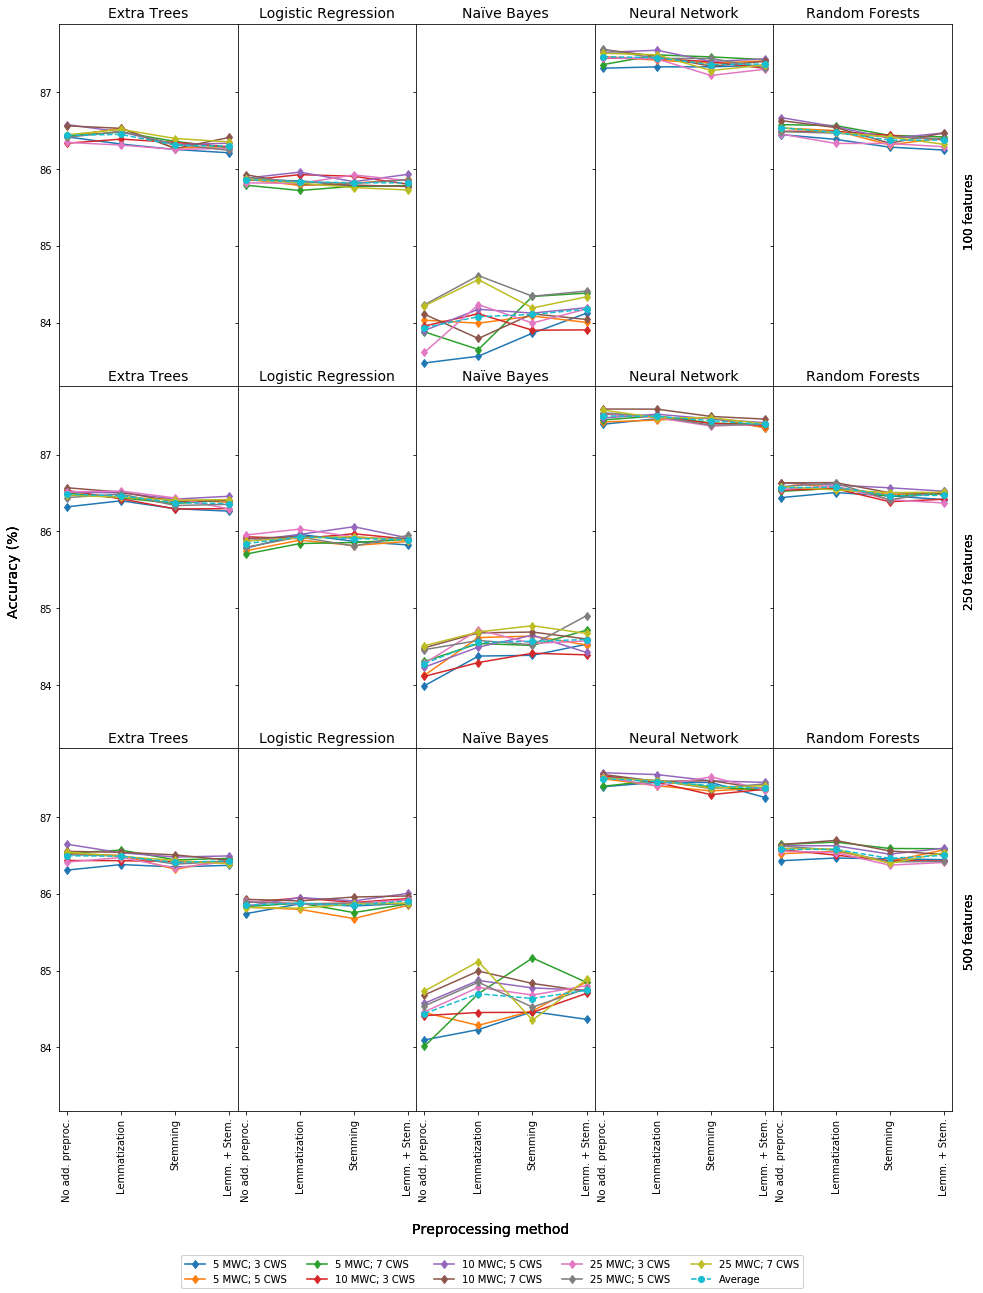

In [359]:
f, axs_acc = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(16, 20))

f.subplots_adjust(hspace=0, wspace=0)

for ft in range(len(fts)):
    for cl in range(len(cls)):
        for mw in range(len(mws)):
            for cx in range(len(cxs)):
                # for rx in range(len(rxs)):
                axs_acc[ft][cl].plot(rxs_full, init_acc_nd[ft, mw, cx, :, cl], '-d')

        axs_acc[ft][cl].plot(rxs_full, init_acc_nd[ft, :, :, :, cl].mean(axis=0).mean(axis=0), '--o')
        axs_acc[ft][cl].set_title(cls_full[cl], fontsize=14)
        axs_acc[ft][cl].set_xticklabels(rxs_full, rotation=90)
        axs_acc[ft][cl].set_ylim(ymax=init_ymax_acc, ymin=init_ymin_acc)

    f.legend([f'{mw} MWC; {cx} CWS' for mw in mws for cx in cxs] + ['Average'], loc=8, ncol=5)
    # f.suptitle(f'Comparison between several classifiers ({fts[ft]} features)', fontsize=16)

    f.text(0.50,  0.04, 'Preprocessing method', ha='center',                      fontsize=14)
    f.text(0.08,  0.50, 'Accuracy (%)',         va='center', rotation='vertical', fontsize=14)

    f.text(0.91, 0.75, '100 features',          va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.50, '250 features',          va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.25, '500 features',          va='center', rotation='vertical', fontsize=12)


f.savefig(f'{init_plot_out}/rx_acc.png')
f.show()

#### (Time, Preprocessing method)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


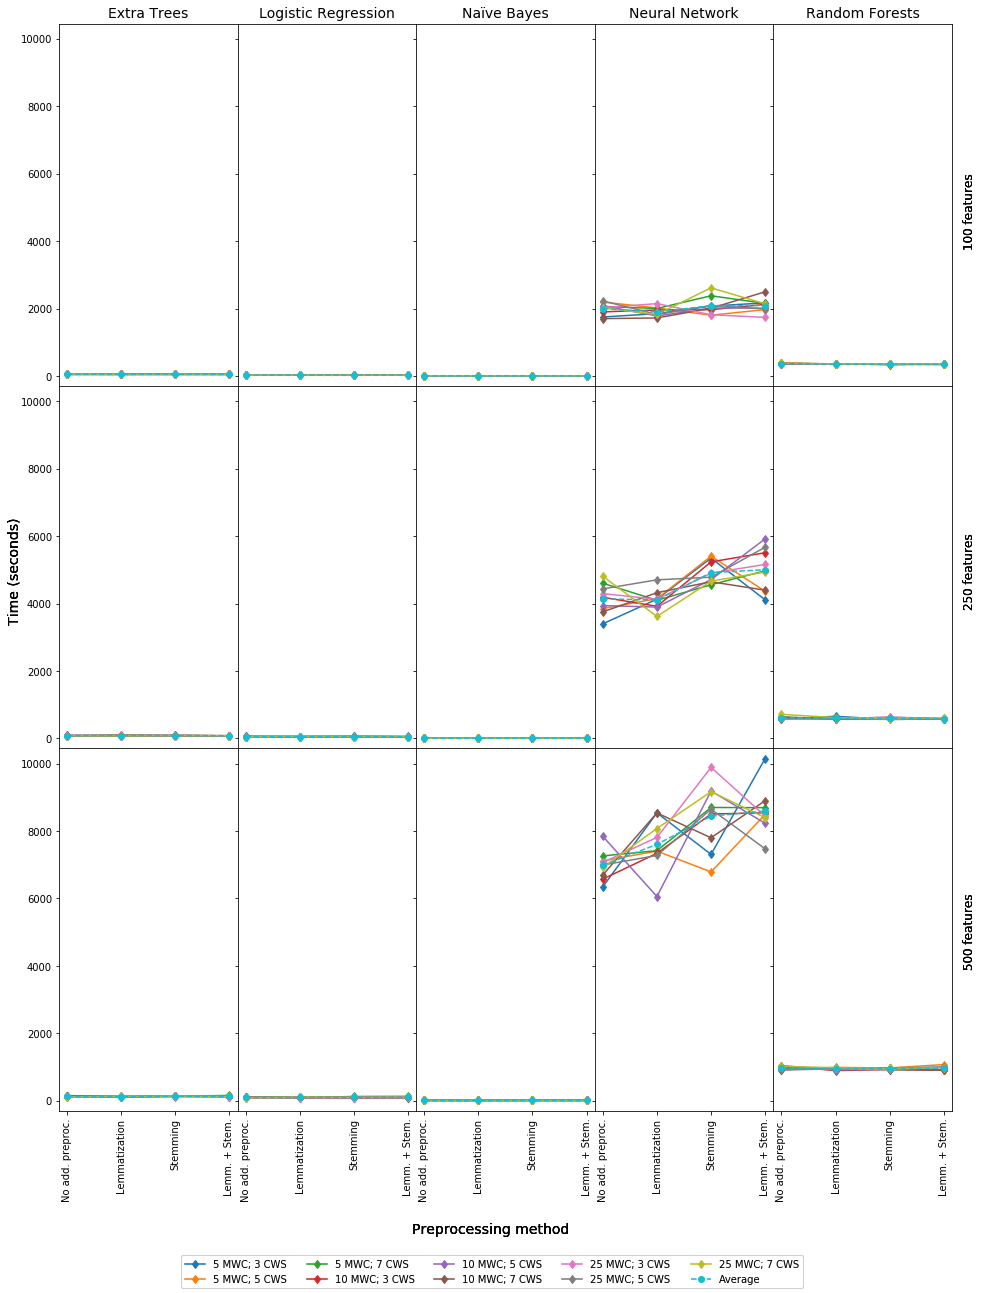

In [358]:
f, axs_tim = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(16, 20))

f.subplots_adjust(hspace=0, wspace=0)

for ft in range(len(fts)):
    for cl in range(len(cls)):
        for mw in range(len(mws)):
            for cx in range(len(cxs)):
                # for rx in range(len(rxs)):
                axs_tim[ft][cl].plot(rxs_full, init_tim_nd[ft, mw, cx, :, cl], '-d')

        axs_tim[ft][cl].plot(rxs_full, init_tim_nd[ft, :, :, :, cl].mean(axis=0).mean(axis=0), '--o')
        axs_tim[ft][cl].set_xticklabels(rxs_full, rotation=90)
        axs_tim[ft][cl].set_ylim(ymax=init_ymax_tim, ymin=init_ymin_tim)

        axs_tim[0][cl].set_title(cls_full[cl], fontsize=14)
        
    f.legend([f'{mw} MWC; {cx} CWS' for mw in mws for cx in cxs] + ['Average'], loc=8, ncol=5)
    # f.suptitle(f'Comparison between several classifiers ({fts[ft]} features)', fontsize=16)

    f.text(0.50, 0.04, 'Preprocessing method', ha='center',                      fontsize=14)
    f.text(0.08, 0.50, 'Time (seconds)',       va='center', rotation='vertical', fontsize=14)

    f.text(0.91, 0.75, '100 features',         va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.50, '250 features',         va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.25, '500 features',         va='center', rotation='vertical', fontsize=12)

f.savefig(f'{init_plot_out}/rx_tim.png')
f.show()

#### (Accuracy, Minimum word count)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


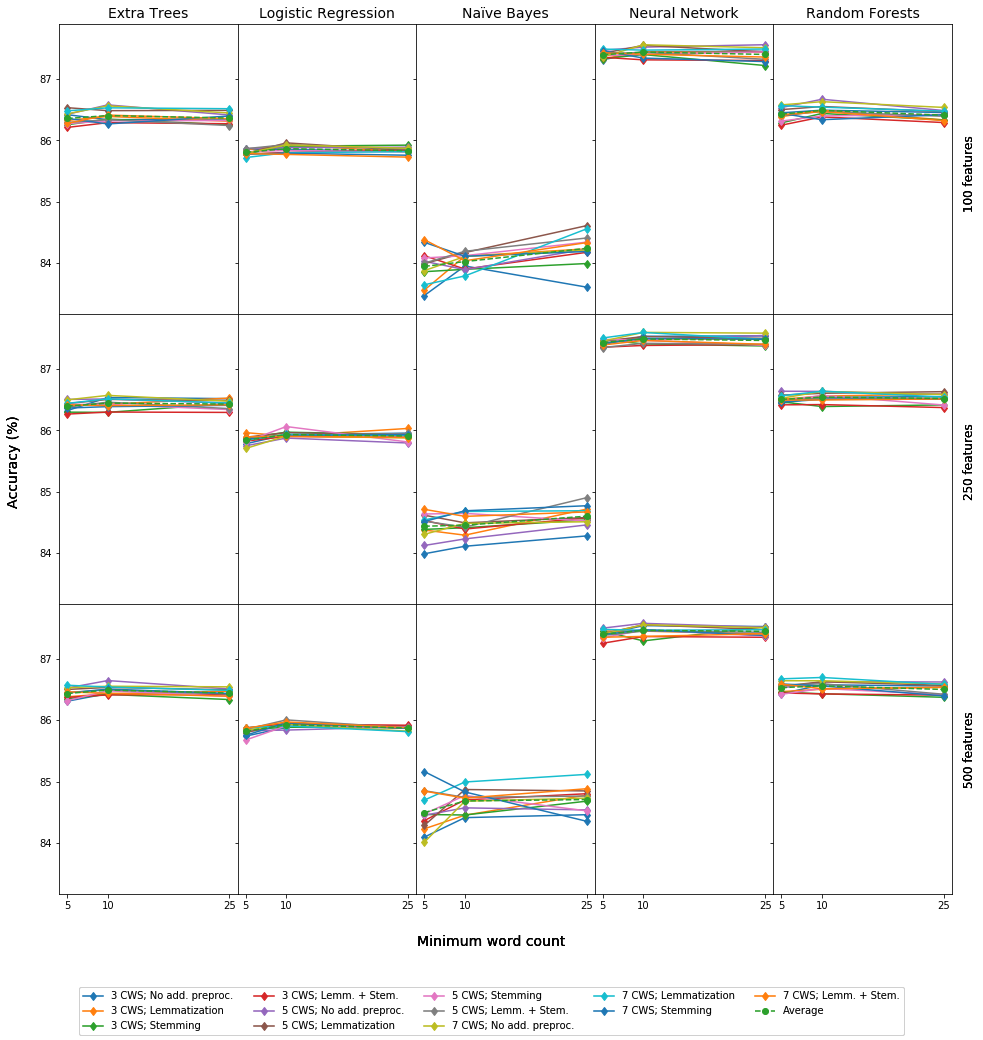

In [357]:
f, axs_acc = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(16, 16))

f.subplots_adjust(hspace=0, wspace=0)

for ft in range(len(fts)):
    for cl in range(len(cls)):
        # for mw in range(len(mws)):
        for cx in range(len(cxs)):
            for rx in range(len(rxs)):
                axs_acc[ft][cl].plot(mws, init_acc_nd[ft, :, cx, rx, cl], '-d')

        axs_acc[ft][cl].plot(mws, init_acc_nd[ft, :, :, :, cl].mean(axis=1).mean(axis=1), '--o')
        axs_acc[ft][cl].set_xticks(mws)
        axs_acc[ft][cl].set_ylim(ymax=init_ymax_acc, ymin=init_ymin_acc)
        
        axs_acc[0][cl].set_title(cls_full[cl], fontsize=14)

    f.legend([f'{cx} CWS; {rx}' for cx in cxs for rx in rxs_full] + ['Average'], loc=8, ncol=5)
    # f.suptitle('Comparison between several classifiers', fontsize=16)

    f.text(0.50, 0.08, 'Minimum word count', ha='center',                      fontsize=14)
    f.text(0.08, 0.50, 'Accuracy (%)',       va='center', rotation='vertical', fontsize=14)

    f.text(0.91, 0.75, '100 features',       va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.50, '250 features',       va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.25, '500 features',       va='center', rotation='vertical', fontsize=12)

f.savefig(f'{init_plot_out}/mw_acc.png')
f.show()

#### (Time, Minimum word count)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


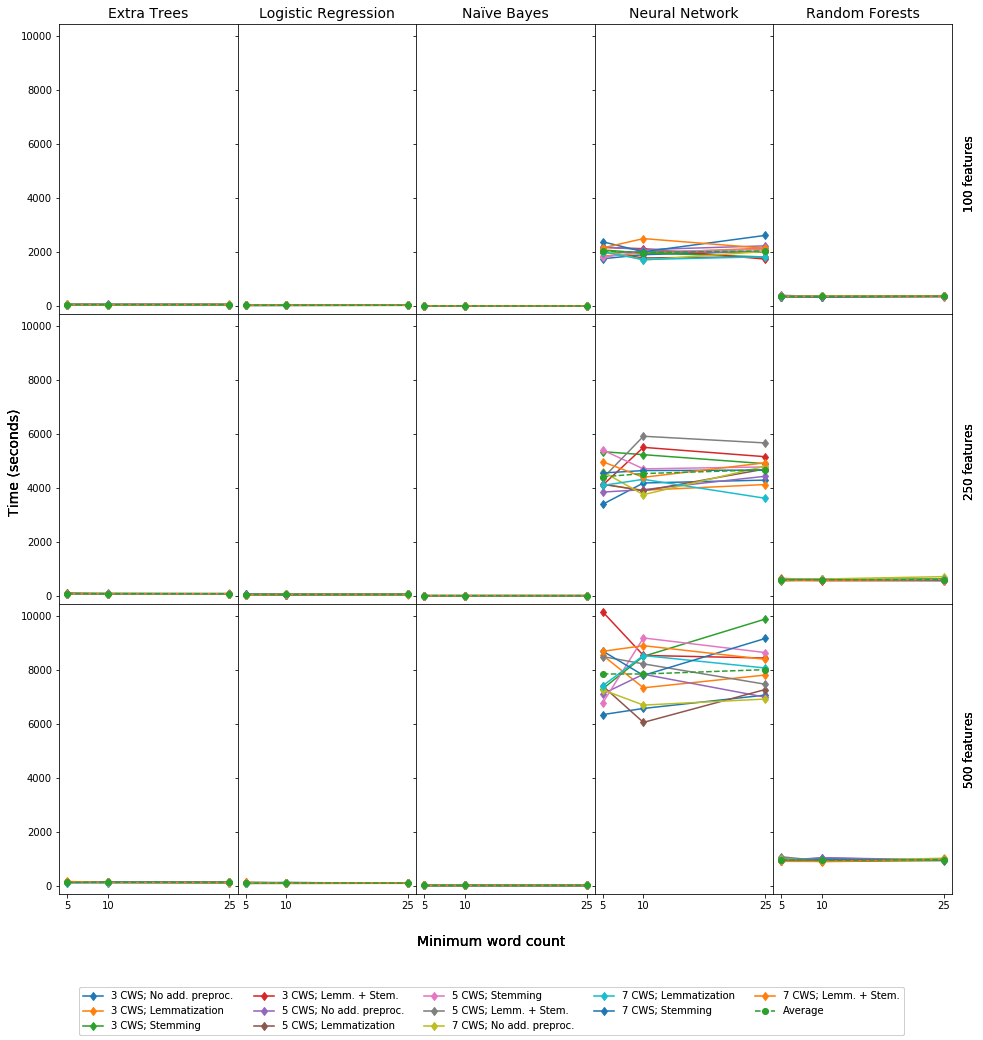

In [356]:
f, axs_tim = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(16, 16))

f.subplots_adjust(hspace=0, wspace=0)

for ft in range(len(fts)):
    for cl in range(len(cls)):
        # for mw in range(len(mws)):
        for cx in range(len(cxs)):
            for rx in range(len(rxs)):
                axs_tim[ft][cl].plot(mws, init_tim_nd[ft, :, cx, rx, cl], '-d')

        axs_tim[ft][cl].plot(mws, init_tim_nd[ft, :, :, :, cl].mean(axis=1).mean(axis=1), '--o')
        axs_tim[ft][cl].set_xticks(mws)
        axs_tim[ft][cl].set_ylim(ymax=init_ymax_tim, ymin=init_ymin_tim)
        
        axs_tim[0][cl].set_title(cls_full[cl], fontsize=14)

    f.legend([f'{cx} CWS; {rx}' for cx in cxs for rx in rxs_full] + ['Average'], loc=8, ncol=5)
    # f.suptitle('Comparison between several classifiers', fontsize=16)

    f.text(0.50, 0.08, 'Minimum word count', ha='center',                      fontsize=14)
    f.text(0.08, 0.50, 'Time (seconds)',     va='center', rotation='vertical', fontsize=14)

    f.text(0.91, 0.75, '100 features',       va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.50, '250 features',       va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.25, '500 features',       va='center', rotation='vertical', fontsize=12)

f.savefig(f'{init_plot_out}/mw_tim.png')
f.show()

#### (Accuracy, Context-window size)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


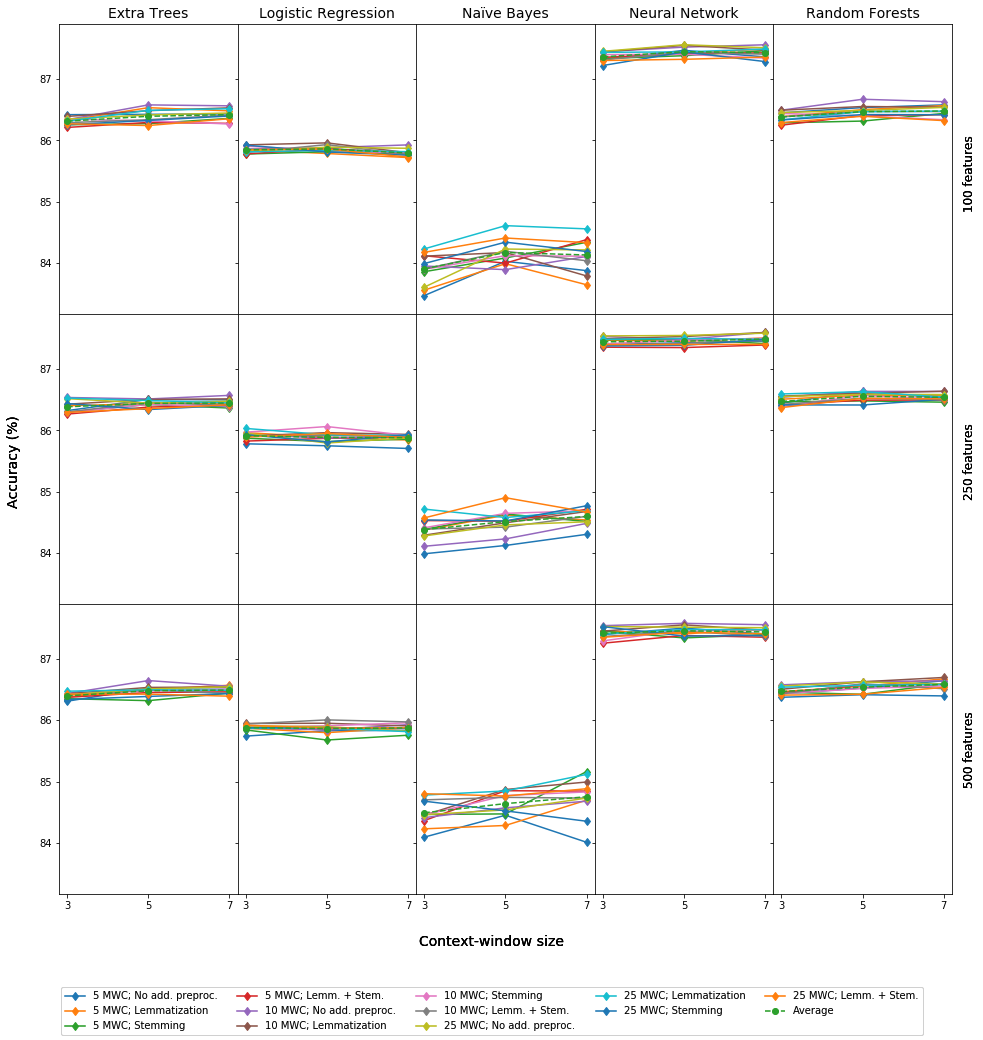

In [361]:
f, axs_acc = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(16, 16))
f.subplots_adjust(hspace=0, wspace=0)

for ft in range(len(fts)):
    for cl in range(len(cls)):
        for mw in range(len(mws)):
        # for cx in range(len(cxs)):
            for rx in range(len(rxs)):
                axs_acc[ft][cl].plot(cxs, init_acc_nd[ft, mw, :, rx, cl], '-d')

        axs_acc[ft][cl].plot(cxs, init_acc_nd[ft, :, :, :, cl].mean(axis=0).mean(axis=1), '--o')
        axs_acc[ft][cl].set_xticks(cxs)
        axs_acc[ft][cl].set_ylim(ymax=init_ymax_acc, ymin=init_ymin_acc)

        axs_acc[0][cl].set_title(cls_full[cl], fontsize=14)
        
    f.legend([f'{mw} MWC; {rx}' for mw in mws for rx in rxs_full] + ['Average'], loc=8, ncol=5)
    # f.suptitle('Comparison between several classifiers', fontsize=16)

    f.text(0.50, 0.08, 'Context-window size', ha='center',                      fontsize=14)
    f.text(0.08, 0.50, 'Accuracy (%)',        va='center', rotation='vertical', fontsize=14)

    f.text(0.91, 0.75, '100 features',        va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.50, '250 features',        va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.25, '500 features',        va='center', rotation='vertical', fontsize=12)

f.savefig(f'{init_plot_out}/cx_acc.png')
f.show()

#### (Time, Context-window size)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


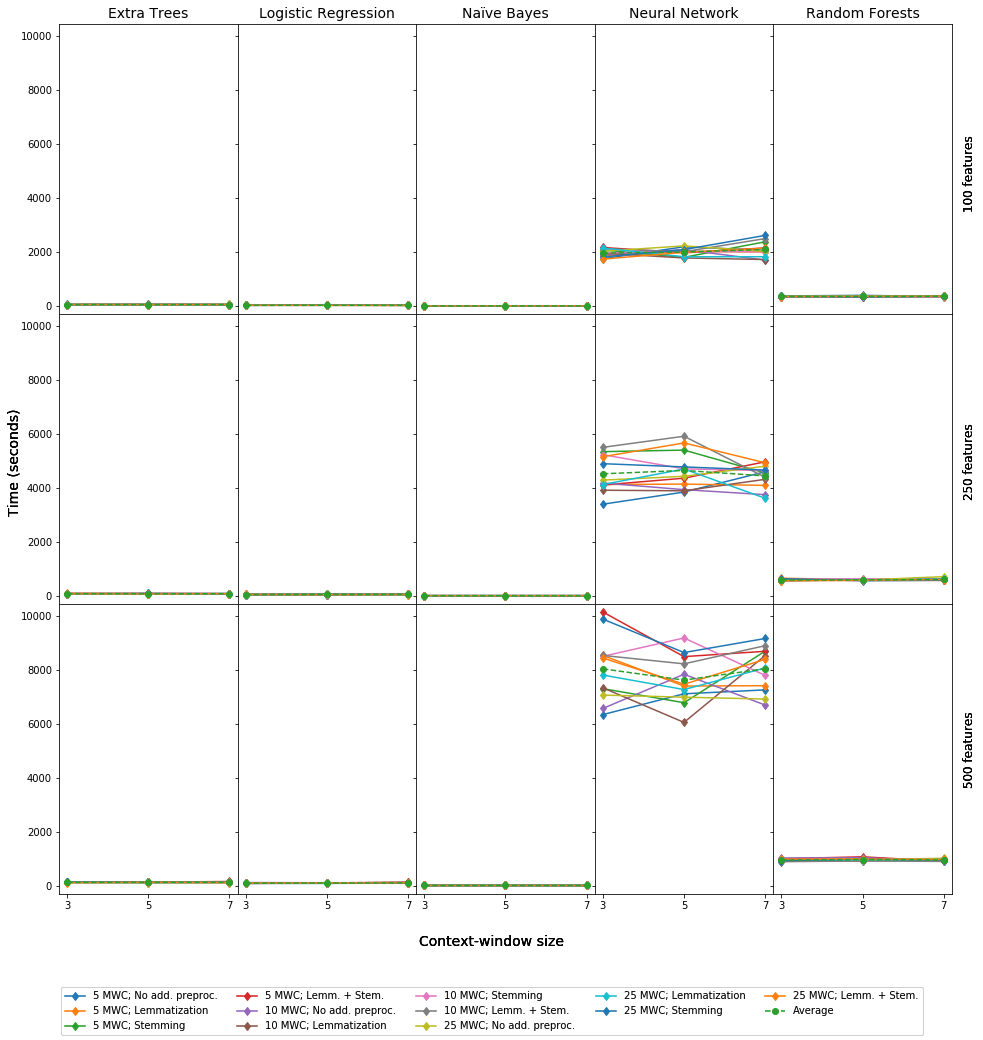

In [362]:
f, axs_tim = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(16, 16))
f.subplots_adjust(hspace=0, wspace=0)

for ft in range(len(fts)):
    for cl in range(len(cls)):
        for mw in range(len(mws)):
        # for cx in range(len(cxs)):
            for rx in range(len(rxs)):
                axs_tim[ft][cl].plot(cxs, init_tim_nd[ft, mw, :, rx, cl], '-d')

        axs_tim[ft][cl].plot(cxs, init_tim_nd[ft, :, :, :, cl].mean(axis=0).mean(axis=1), '--o')
        axs_tim[ft][cl].set_xticks(cxs)
        axs_tim[ft][cl].set_ylim(ymax=init_ymax_tim, ymin=init_ymin_tim)
        
        axs_tim[0][cl].set_title(cls_full[cl], fontsize=14)

    f.legend([f'{mw} MWC; {rx}' for mw in mws for rx in rxs_full] + ['Average'], loc=8, ncol=5)
    # f.suptitle('Comparison between several classifiers', fontsize=16)

    f.text(0.50, 0.08, 'Context-window size', ha='center',                      fontsize=14)
    f.text(0.08, 0.50, 'Time (seconds)',      va='center', rotation='vertical', fontsize=14)

    f.text(0.91, 0.75, '100 features',        va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.50, '250 features',        va='center', rotation='vertical', fontsize=12)
    f.text(0.91, 0.25, '500 features',        va='center', rotation='vertical', fontsize=12)

f.savefig(f'{init_plot_out}/cx_tim.png')
f.show()

#### Summarized bar plot (Mean Accuracy)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


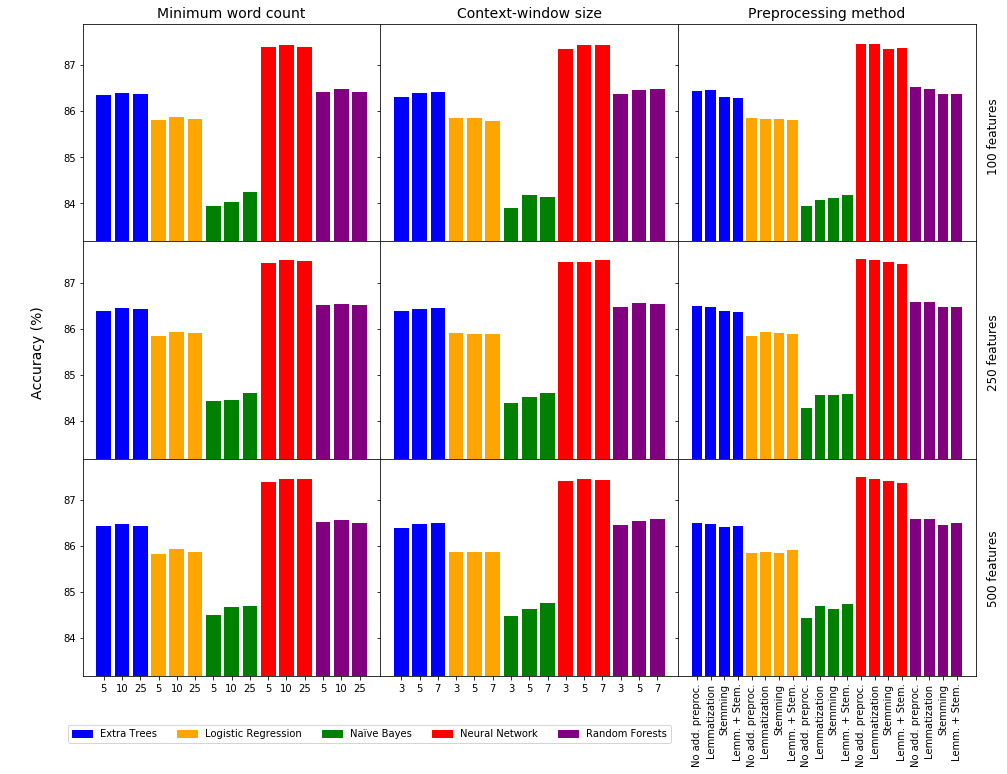

In [349]:
f, axs_acc = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(16, 12))
f.subplots_adjust(hspace=0, wspace=0)

axs_acc[0][0].set_title('Minimum word count', fontsize=14)
axs_acc[0][1].set_title('Context-window size', fontsize=14)
axs_acc[0][2].set_title('Preprocessing method', fontsize=14)

for ft in range(len(fts)):
    lines = list()

    # Minimum word count
    for cl in range(len(cls)):
        for mw in range(len(mws)):
            axs_acc[ft][0].bar(f'{cls[cl]}_{mws[mw]}',
                           height=init_acc_nd[ft, mw, :, :, cl].mean(),
                           color=colors[cl])

    # axs_acc[ft][0].set_title('Minimum word count', fontsize=14)
    axs_acc[ft][0].set_xticklabels(mws * 5)
    axs_acc[ft][0].set_ylim(ymin=init_ymin_acc, ymax=init_ymax_acc)

    # Context-window size
    for cl in range(len(cls)):
        for cx in range(len(cxs)):
            axs_acc[ft][1].bar(f'{cls[cl]}_{cxs[cx]}',
                           height=init_acc_nd[ft, :, cx, :, cl].mean(),
                           color=colors[cl])

    # axs_acc[ft][1].set_title('Context-window size', fontsize=14)
    axs_acc[ft][1].set_xticklabels(cxs * 5)
    axs_acc[ft][1].set_ylim(ymin=init_ymin_acc, ymax=init_ymax_acc)

    # Preprocessing method
    for cl in range(len(cls)):
        for rx in range(len(rxs)):
            axs_acc[ft][2].bar(f'{cls[cl]}_{rxs[rx]}',
                           height=init_acc_nd[ft, :, :, rx, cl].mean(),
                           color=colors[cl])

    # axs_acc[ft][2].set_title('Preprocessing method', fontsize=14)
    axs_acc[ft][2].set_xticklabels([rx for rx in rxs_full] * 5, rotation=90)
    axs_acc[ft][2].set_ylim(ymin=init_ymin_acc, ymax=init_ymax_acc)

    patches = [mpatches.Patch(color=colors[cl], label=cls_full[cl])
               for cl in range(len(cls))]

f.legend(handles=patches, ncol=5, loc=3, bbox_to_anchor=(0.055, 0.03))
# f.suptitle('Comparison between several classifiers and word2vec-model parameters (Mean accuracy)',
#            fontsize=16, y=0.95)

f.text(0.08,  0.50, 'Accuracy (%)', va='center', rotation='vertical', fontsize=14)

f.text(0.91,  0.75, '100 features', va='center', rotation='vertical', fontsize=12)
f.text(0.91,  0.50, '250 features', va='center', rotation='vertical', fontsize=12)
f.text(0.91,  0.25, '500 features', va='center', rotation='vertical', fontsize=12)

f.savefig(f'{init_plot_out}/avg_acc.png')
f.show()

#### Summarized bar plot (Maximum Accuracy)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


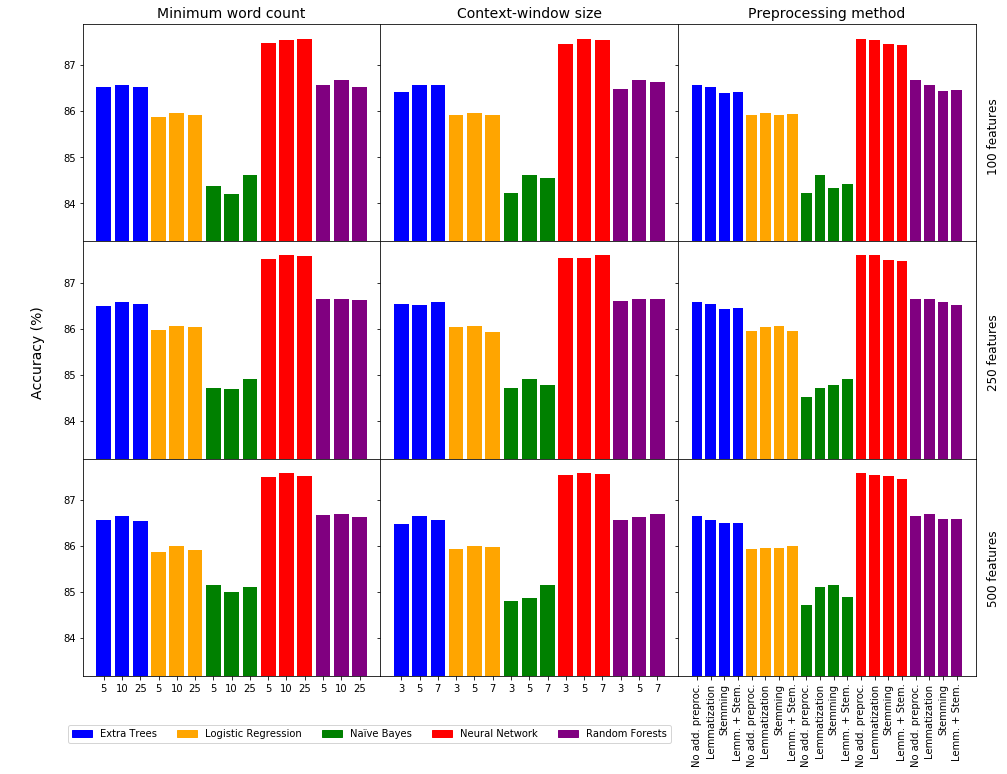

In [351]:
f, axs_acc = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(16, 12))
f.subplots_adjust(hspace=0, wspace=0)

axs_acc[0][0].set_title('Minimum word count', fontsize=14)
axs_acc[0][1].set_title('Context-window size', fontsize=14)
axs_acc[0][2].set_title('Preprocessing method', fontsize=14)

for ft in range(len(fts)):
    lines = list()

    # Minimum word count
    for cl in range(len(cls)):
        for mw in range(len(mws)):
            axs_acc[ft][0].bar(f'{cls[cl]}_{mws[mw]}',
                           height=init_acc_nd[ft, mw, :, :, cl].max(),
                           color=colors[cl])

    # Context-window size
    for cl in range(len(cls)):
        for cx in range(len(cxs)):
            axs_acc[ft][1].bar(f'{cls[cl]}_{cxs[cx]}',
                           height=init_acc_nd[ft, :, cx, :, cl].max(),
                           color=colors[cl])

    # Preprocessing method
    for cl in range(len(cls)):
        for rx in range(len(rxs)):
            axs_acc[ft][2].bar(f'{cls[cl]}_{rxs[rx]}',
                           height=init_acc_nd[ft, :, :, rx, cl].max(),
                           color=colors[cl])

    # axs_acc[ft][0].set_title('Minimum word count', fontsize=14)
    axs_acc[ft][0].set_xticklabels(mws * 5)
    axs_acc[ft][0].set_ylim(ymin=init_ymin_acc, ymax=init_ymax_acc)

    # axs_acc[ft][1].set_title('Context-window size', fontsize=14)
    axs_acc[ft][1].set_xticklabels(cxs * 5)
    axs_acc[ft][1].set_ylim(ymin=init_ymin_acc, ymax=init_ymax_acc)

    # axs_acc[ft][2].set_title('Preprocessing method', fontsize=14)
    axs_acc[ft][2].set_xticklabels([rx for rx in rxs_full] * 5, rotation=90)
    axs_acc[ft][2].set_ylim(ymin=init_ymin_acc, ymax=init_ymax_acc)

    patches = [mpatches.Patch(color=colors[cl], label=cls_full[cl])
               for cl in range(len(cls))]

f.legend(handles=patches, ncol=5, loc=3, bbox_to_anchor=(0.055, 0.03))
# f.suptitle('Comparison between several classifiers and word2vec-model parameters (Maximum)',
#            fontsize=16, y=0.95)

f.text(0.08, 0.50, 'Accuracy (%)', va='center', rotation='vertical', fontsize=14)

f.text(0.91, 0.75, '100 features', va='center', rotation='vertical', fontsize=12)
f.text(0.91, 0.50, '250 features', va='center', rotation='vertical', fontsize=12)
f.text(0.91, 0.25, '500 features', va='center', rotation='vertical', fontsize=12)

f.savefig(f'{init_plot_out}/max_acc.png')
f.show()

## Comparison between classifiers and parameters including each number of features

#### Preprocessing method (Mean accuracy)

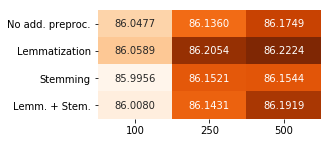

Variance:


100    0.000931
250    0.000993
500    0.000826
dtype: float64

In [55]:
acc_rx_mean = pd.DataFrame(init_acc_nd.mean(axis=1).mean(axis=1).mean(axis=2),
                           columns=rxs_full, index=fts).transpose()

plt.figure(figsize=(4, 2))
seaborn.heatmap(acc_rx_mean, cmap='Oranges', annot=True, fmt='.4f', cbar=0)
plt.show()

print('Variance:')
display(acc_rx_mean.var())

#### Preprocessing method (Maximum accuracy)

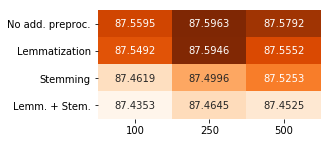

Variance:


100    0.003863
250    0.004497
500    0.003025
dtype: float64

In [56]:
acc_rx_max = pd.DataFrame(init_acc_nd.max(axis=1).max(axis=1).max(axis=2),
                           columns=rxs_full, index=fts).transpose()

plt.figure(figsize=(4, 2))
seaborn.heatmap(acc_rx_max, cmap='Oranges', annot=True, fmt='.4f', cbar=0)
plt.show()

print('Variance:')
display(acc_rx_max.var())

Very similar values (low variance)...

#### Minimum word count (Mean accuracy)

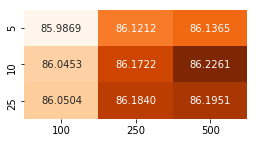

Variance:


100    0.001243
250    0.001113
500    0.002074
dtype: float64

In [33]:
acc_mw_mean = pd.DataFrame(init_acc_nd.mean(axis=2).mean(axis=2).mean(axis=2),
                           columns=mws, index=fts).transpose()

plt.figure(figsize=(4, 2))
seaborn.heatmap(acc_mw_mean, cmap='Oranges', annot=True, fmt='.4f', cbar=0)
plt.show()

print('Variance:')
display(acc_mw_mean.var())

#### Minimum word count (Maximum accuracy)

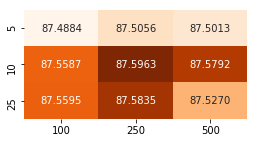

Variance:


100    0.001664
250    0.002413
500    0.001577
dtype: float64

In [38]:
acc_mw_max = pd.DataFrame(init_acc_nd.max(axis=2).max(axis=2).max(axis=2),
                           columns=mws, index=fts).transpose()

plt.figure(figsize=(4, 2))
seaborn.heatmap(acc_mw_max, cmap='Oranges', annot=True, fmt='.4f', cbar=0)
plt.show()

print('Variance:')
display(acc_mw_max.var())

Very similar values (low variance)...

#### Context-window size (Mean accuracy)

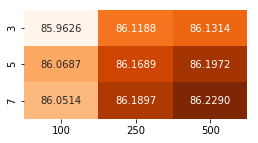

Variance:


100    0.003240
250    0.001329
500    0.002478
dtype: float64

In [34]:
acc_cx_mean = pd.DataFrame(init_acc_nd.mean(axis=1).mean(axis=2).mean(axis=2),
                           columns=cxs, index=fts).transpose()

plt.figure(figsize=(4, 2))
seaborn.heatmap(acc_cx_mean, cmap='Oranges', annot=True, fmt='.4f', cbar=0)
plt.show()

print('Variance:')
display(acc_cx_mean.var())

#### Context-window size (Maximum accuracy)

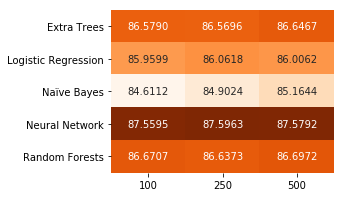

Variance:


100    1.191586
250    0.965673
500    0.804937
dtype: float64

In [37]:
acc_cl_max = pd.DataFrame(init_acc_nd.max(axis=1).max(axis=1).max(axis=1),
                           columns=cls_full, index=fts).transpose()

plt.figure(figsize=(4, 3))
seaborn.heatmap(acc_cl_max, cmap='Oranges', annot=True, fmt='.4f', cbar=0)
plt.show()

print('Variance:')
display(acc_cl_max.var())

Very similar values (low variance)...

#### Classifier (Mean accuracy)

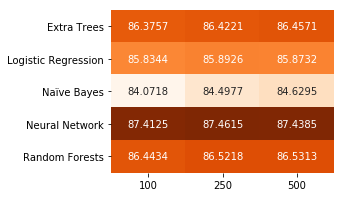

Variance:


100    1.518626
250    1.182038
500    1.070488
dtype: float64

In [35]:
acc_cl_mean = pd.DataFrame(init_acc_nd.mean(axis=1).mean(axis=1).mean(axis=1),
                           columns=cls_full, index=fts).transpose()

plt.figure(figsize=(4, 3))
seaborn.heatmap(acc_cl_mean, cmap='Oranges', annot=True, fmt='.4f', cbar=0)
plt.show()

print('Variance:')
display(acc_cl_mean.var())

#### Classifier (Maximum accuracy)

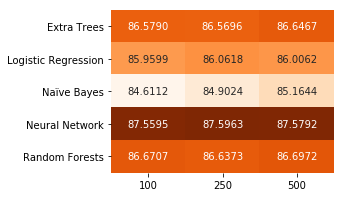

Variance:


100    1.191586
250    0.965673
500    0.804937
dtype: float64

In [62]:
acc_cl_max = pd.DataFrame(init_acc_nd.max(axis=1).max(axis=1).max(axis=1),
                           columns=cls_full, index=fts).transpose()

plt.figure(figsize=(4, 3))
seaborn.heatmap(acc_cl_max, cmap='Oranges', annot=True, fmt='.4f', cbar=0)
plt.show()

print('Variance:')
display(acc_cl_max.var())

NN classifier is superior to the other classifiers.

##### Each combination

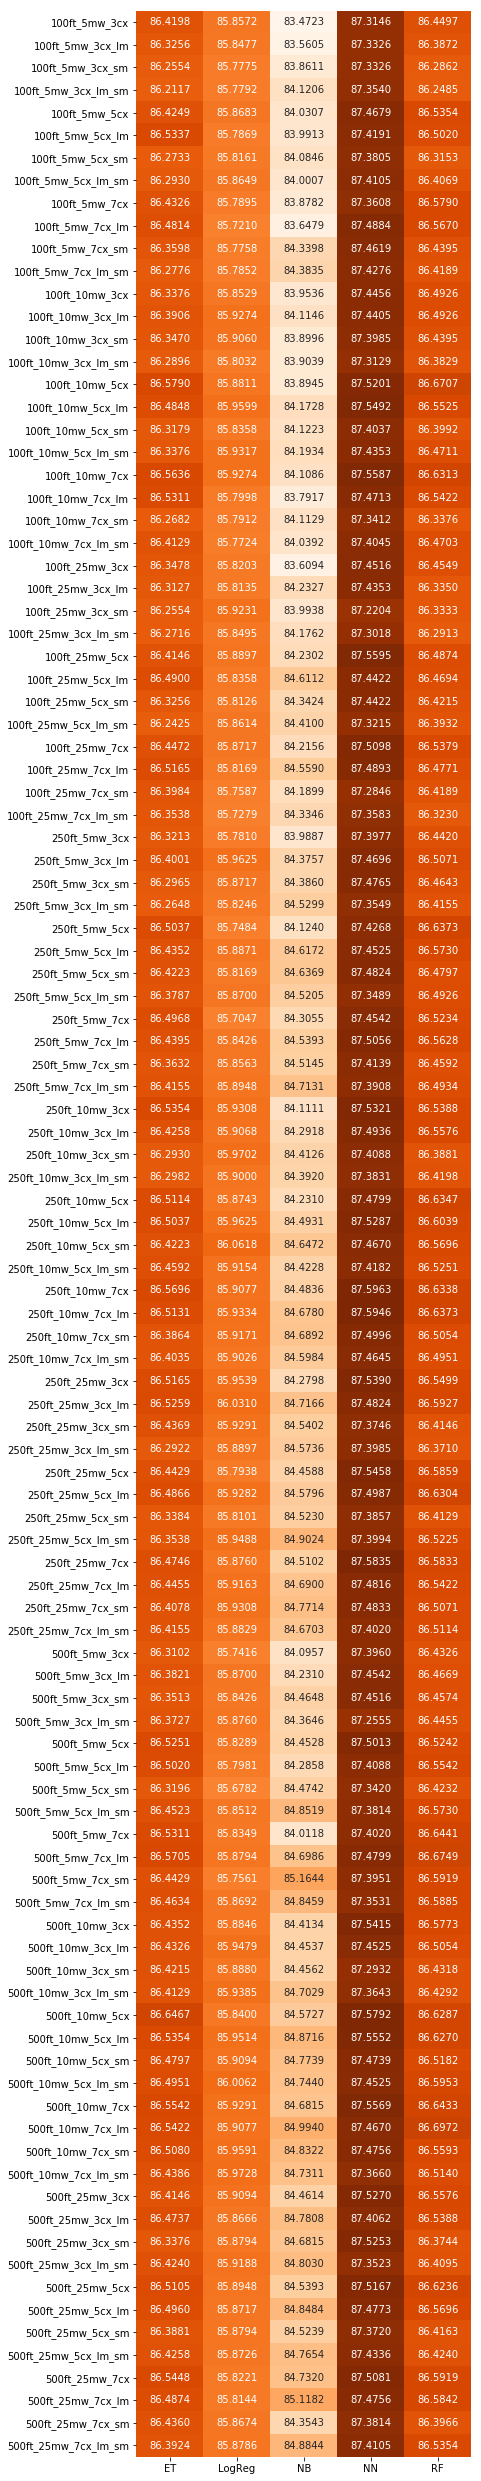

In [59]:
plt.figure(figsize=(6, 45))
seaborn.heatmap(
    pd.DataFrame(init_acc_nd.flatten().reshape((108, 5)), columns=cls,
                 index=[f'{ft}ft_{mw}mw_{cx}cx{rx}'
                        for ft in fts
                        for mw in mws
                        for cx in cxs
                        for rx in rxs]),
    cmap='Oranges', annot=True, fmt='.4f', cbar=0
)
plt.show()

#### NN internal comparison

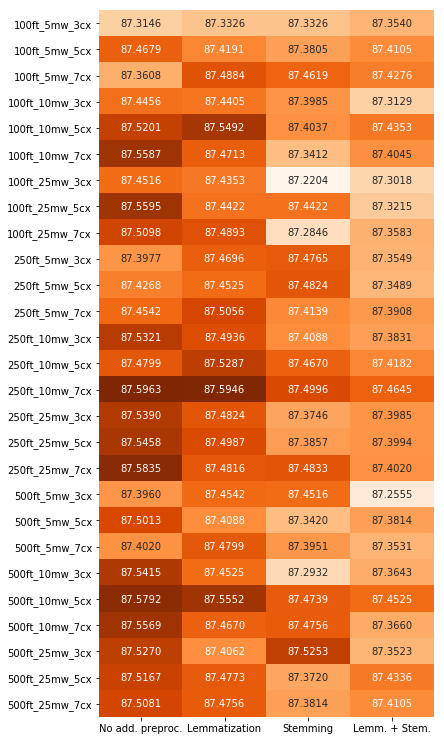

In [58]:
plt.figure(figsize=(6, 13))
seaborn.heatmap(
    pd.DataFrame(init_acc_nd[:, :, :, :, 3].flatten().reshape((27, 4)), columns=rxs_full,
                 index=[f'{ft}ft_{mw}mw_{cx}cx'
                        for ft in fts
                        for mw in mws
                        for cx in cxs]),
    cmap='Oranges', annot=True, fmt='.4f', cbar=0
)
plt.show()

#### Confusion matrix; Precision; Recall; F<sub>1</sub>-score of the best initial classifier

In [398]:
conf_mtx(pd.DataFrame(init_out_df['250ft_10mw_7cx_NN_1000iter']), t)

TP: 49850
FN: 8540
FP: 5945
TN: 52445

Accuracy: 87.5963

Precision: 0.8934
Recall: 0.8537
F1-score: 0.8731


(49850, 8540, 5945, 52445)

##### Time needed to evaluate

In [407]:
init_tim_df.sum(axis=1)['250ft_10mw_7cx_NN_1000iter']

3751.883

<hr style="height: 5px" />

## Additional training

In [95]:
addt_data_in = '../data/04_models_word2vec/01_additional_results'

pprint(sorted(os.listdir(addt_data_in)))

['100ft_10mw_5cx_lm_20180927141059_acc.csv',
 '100ft_10mw_5cx_lm_20180927141059_out.csv',
 '100ft_10mw_5cx_lm_20180927141059_tim.csv',
 '100ft_20180927141059_model_time.csv']


In [96]:
addt_plot_out = '../plots/04_models_word2vec/01_additional_results'

#### Neural Network: Parameter list

In [98]:
its = [1000]                    # maximum iterations   | default:  200
afs = ['logistic', 'relu']      # activation functions | default: 'relu'
pts = [0.25, 0.50, 0.75, 1.00]  # power_t              | default: 0.5
tls = [1e-4, 1e-5]              # tolerances           | default: 1e-4

#### Load Data

In [106]:
addt_acc = list()
addt_out = list()
addt_tim = list()

for file in sorted(os.listdir(addt_data_in)):
    if 'acc.csv' in file:
        addt_acc.append(pd.read_csv(f'{addt_data_in}/{file}', index_col='Unnamed: 0'))
    if 'out.csv' in file:
        addt_out.append(pd.read_csv(f'{addt_data_in}/{file}', index_col='Unnamed: 0'))
    if 'tim.csv' in file:
        addt_tim.append(pd.read_csv(f'{addt_data_in}/{file}', index_col='Unnamed: 0'))

addt_acc_df = pd.concat(addt_acc) * 100
addt_out_df = pd.concat(addt_out, axis=1)
addt_tim_df = pd.concat(addt_tim)

#### (Accuracy, Time) $\rightarrow$ DataFrame

In [107]:
addt_results = pd.DataFrame([addt_acc_df.mean(axis=1), addt_tim_df.sum(axis=1)]).transpose()
addt_results.columns = ['Accuracy', 'Time']

In [108]:
addt_results.sort_values(by='Accuracy', ascending=False) \
            .style.background_gradient(cmap='Oranges')

,Accuracy,Time
100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_1e-05tl,87.6332,2946.42
100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_0.0001tl,87.6237,1786.42
100ft_10mw_5cx_lm_NN_1000iter_relu_0.25pt_0.0001tl,87.5595,1740.75
100ft_10mw_5cx_lm_NN_1000iter_relu_1.0pt_1e-05tl,87.5398,2580.02
100ft_10mw_5cx_lm_NN_1000iter_relu_0.5pt_1e-05tl,87.5372,2475.32
100ft_10mw_5cx_lm_NN_1000iter_relu_0.25pt_1e-05tl,87.5278,2593.7
100ft_10mw_5cx_lm_NN_1000iter_relu_0.5pt_0.0001tl,87.4687,1844.48
100ft_10mw_5cx_lm_NN_1000iter_relu_1.0pt_0.0001tl,87.4396,1983.88
100ft_10mw_5cx_lm_NN_1000iter_logistic_0.5pt_1e-05tl,87.1939,1278.92
100ft_10mw_5cx_lm_NN_1000iter_logistic_1.0pt_1e-05tl,87.1365,1381.95


#### DataFrame $\rightarrow$ <code>numpy.ndarray</code>

In [363]:
addt_results.round(dec)

,Accuracy,Time
100ft_10mw_5cx_lm_NN_1000iter_logistic_0.25pt_0.0001tl,86.9404,838.428
100ft_10mw_5cx_lm_NN_1000iter_logistic_0.25pt_1e-05tl,87.1117,1244.701
100ft_10mw_5cx_lm_NN_1000iter_logistic_0.5pt_0.0001tl,86.9130,865.198
100ft_10mw_5cx_lm_NN_1000iter_logistic_0.5pt_1e-05tl,87.1939,1278.924
100ft_10mw_5cx_lm_NN_1000iter_logistic_0.75pt_0.0001tl,86.5996,624.290
100ft_10mw_5cx_lm_NN_1000iter_logistic_0.75pt_1e-05tl,87.0748,1365.152
100ft_10mw_5cx_lm_NN_1000iter_logistic_1.0pt_0.0001tl,86.6612,729.137
100ft_10mw_5cx_lm_NN_1000iter_logistic_1.0pt_1e-05tl,87.1365,1381.950
100ft_10mw_5cx_lm_NN_1000iter_relu_0.25pt_0.0001tl,87.5595,1740.754
100ft_10mw_5cx_lm_NN_1000iter_relu_0.25pt_1e-05tl,87.5278,2593.700


In [120]:
addt_acc_nd = np.ndarray((len(its), len(afs), len(pts), len(tls)))
addt_tim_nd = np.ndarray((len(its), len(afs), len(pts), len(tls)))

for it in range(len(its)):
    for af in range(len(afs)):
        for pt in range(len(pts)):
            for tl in range(len(tls)):
                addt_acc_nd[it, af, pt, tl] = addt_results['Accuracy']. \
                filter(regex=f'.*{its[it]}iter_{afs[af]}_{pts[pt]}pt_{tls[tl]}tl.*')[0]

                addt_tim_nd[it, af, pt, tl] = addt_results['Time']. \
                filter(regex=f'.*{its[it]}iter_{afs[af]}_{pts[pt]}pt_{tls[tl]}tl.*')[0]

print('Accuracy shape:', addt_acc_nd.shape)
print('Time shape:    ', addt_tim_nd.shape)

Accuracy shape: (1, 2, 4, 2)
Time shape:     (1, 2, 4, 2)


#### Plotting settings

In [139]:
offset_acc = 0.15
addt_ymax_acc   = addt_acc_nd.max() + offset_acc
addt_ymin_acc   = addt_acc_nd.min() - offset_acc

offset_tim = 300
addt_ymax_tim   = addt_tim_nd.max() + offset_tim
addt_ymin_tim   = addt_tim_nd.min() - offset_tim

#### (Accuracy, (Activation function, Power t, Tolerance))

In [174]:
addt_acc_nd[0, :, 0, :]

array([[86.94040075, 87.11166296],
       [87.55951362, 87.52783011]])

In [165]:
addt_acc_nd[0].mean()

array([[86.94040075, 87.11166296, 86.9129988 , 87.19386881],
       [86.59958897, 87.07484158, 86.66124336, 87.13649598],
       [87.55951362, 87.52783011, 87.46874465, 87.53724953],
       [87.62373694, 87.63315636, 87.43963007, 87.53981846]])

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


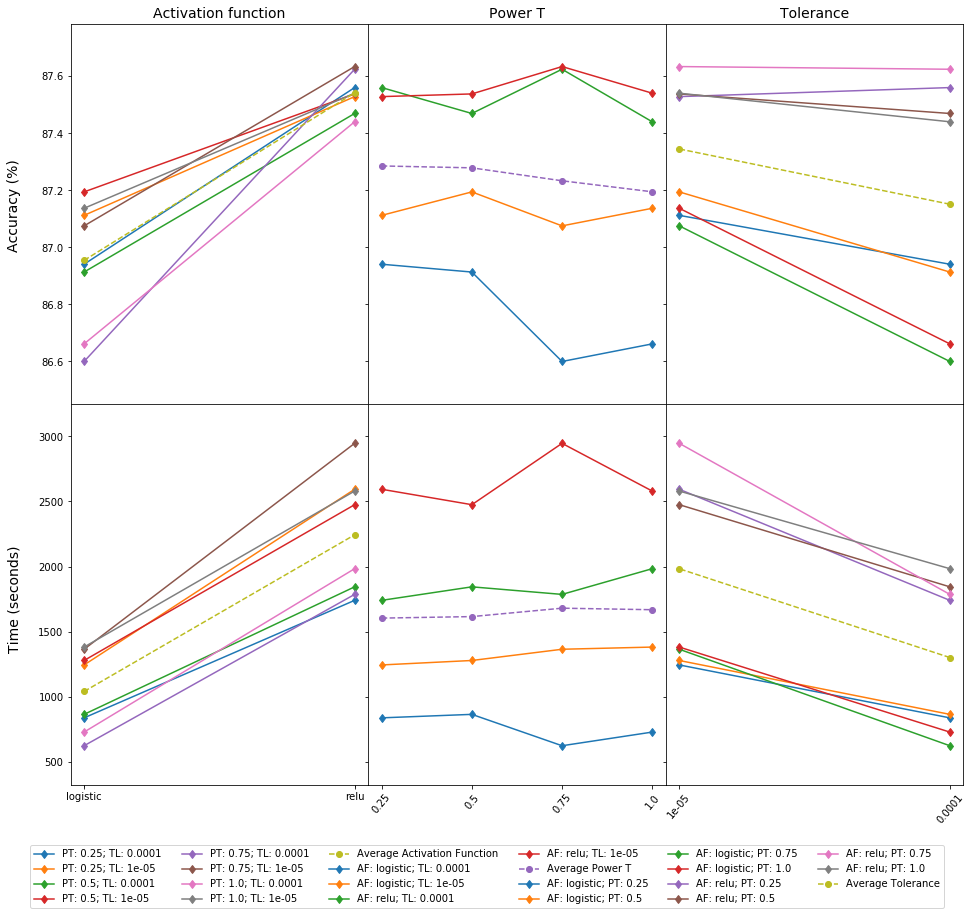

In [251]:
f, (axs_acc, axs_tim) = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(16, 14))
f.subplots_adjust(hspace=0, wspace=0)

axs_acc[0].set_title('Activation function', fontsize=14)
axs_acc[1].set_title('Power T', fontsize=14)
axs_acc[2].set_title('Tolerance', fontsize=14)

# Activation function (accuracy)
axs_acc[0].plot(afs, [addt_acc_nd[0, af, :, :].flatten() for af in range(len(afs))], '-d')
axs_acc[0].plot(afs, addt_acc_nd[0].mean(axis=1).mean(axis=1), '--o')
axs_acc[0].set_xticks([0, 1], afs)
axs_acc[0].set_xticklabels(afs)
axs_acc[0].set_ylim(ymin=addt_ymin_acc, ymax=addt_ymax_acc)

# Power t (accuracy)
axs_acc[1].plot(pts, [addt_acc_nd[0, :, pt, :].flatten() for pt in range(len(pts))], '-d')
axs_acc[1].plot(pts, addt_acc_nd[0].mean(axis=0).mean(axis=1), '--o')
axs_acc[1].set_xticks(pts)
axs_acc[1].set_xticklabels(pts, rotation=50)
axs_acc[1].set_ylim(ymin=addt_ymin_acc, ymax=addt_ymax_acc)

# Tolerance (accuracy)
axs_acc[2].plot(tls, [addt_acc_nd[0, :, :, tl].flatten() for tl in range(len(tls))], '-d')
axs_acc[2].plot(tls, addt_acc_nd[0].mean(axis=0).mean(axis=0), '--o')
axs_acc[2].set_xticks(tls)
axs_acc[2].set_xticklabels(tls, rotation=50)
axs_acc[2].set_ylim(ymin=addt_ymin_acc, ymax=addt_ymax_acc)

# Activation function (time)
axs_tim[0].plot(afs, [addt_tim_nd[0, af, :, :].flatten() for af in range(len(afs))], '-d')
axs_tim[0].plot(afs, addt_tim_nd[0].mean(axis=1).mean(axis=1), '--o')
axs_tim[0].set_xticks([0, 1], afs)
axs_tim[0].set_xticklabels(afs)
axs_tim[0].set_ylim(ymin=addt_ymin_tim, ymax=addt_ymax_tim)

# Power t (time)
axs_tim[1].plot(pts, [addt_tim_nd[0, :, pt, :].flatten() for pt in range(len(pts))], '-d')
axs_tim[1].plot(pts, addt_tim_nd[0].mean(axis=0).mean(axis=1), '--o')
axs_tim[1].set_xticks(pts)
axs_tim[1].set_xticklabels(pts, rotation=50)
axs_tim[1].set_ylim(ymin=addt_ymin_tim, ymax=addt_ymax_tim)

# Tolerance (time)
axs_tim[2].plot(tls, [addt_tim_nd[0, :, :, tl].flatten() for tl in range(len(tls))], '-d')
axs_tim[2].plot(tls, addt_tim_nd[0].mean(axis=0).mean(axis=0), '--o')
axs_tim[2].set_xticks(tls)
axs_tim[2].set_xticklabels(tls, rotation=50)
axs_tim[2].set_ylim(ymin=addt_ymin_tim, ymax=addt_ymax_tim)

# f.suptitle('', fontsize=16, y=0.95)

f.text(0.07,  0.70, 'Accuracy (%)',   va='center', rotation='vertical', fontsize=14)
f.text(0.07,  0.31, 'Time (seconds)', va='center', rotation='vertical', fontsize=14)

f.legend([f'PT: {pt}; TL: {tl}' for pt in pts for tl in tls] + ['Average (Activation Function)'] + 
         [f'AF: {af}; TL: {tl}' for af in afs for tl in tls] + ['Average (Power T)'] + 
         [f'AF: {af}; PT: {pt}' for af in afs for pt in pts] + ['Average (Tolerance)'],
         ncol=6, loc=8)

f.savefig(f'{addt_plot_out}/acc_tim.png')
f.show()

#### Summarized bar plot (Mean Accuracy)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


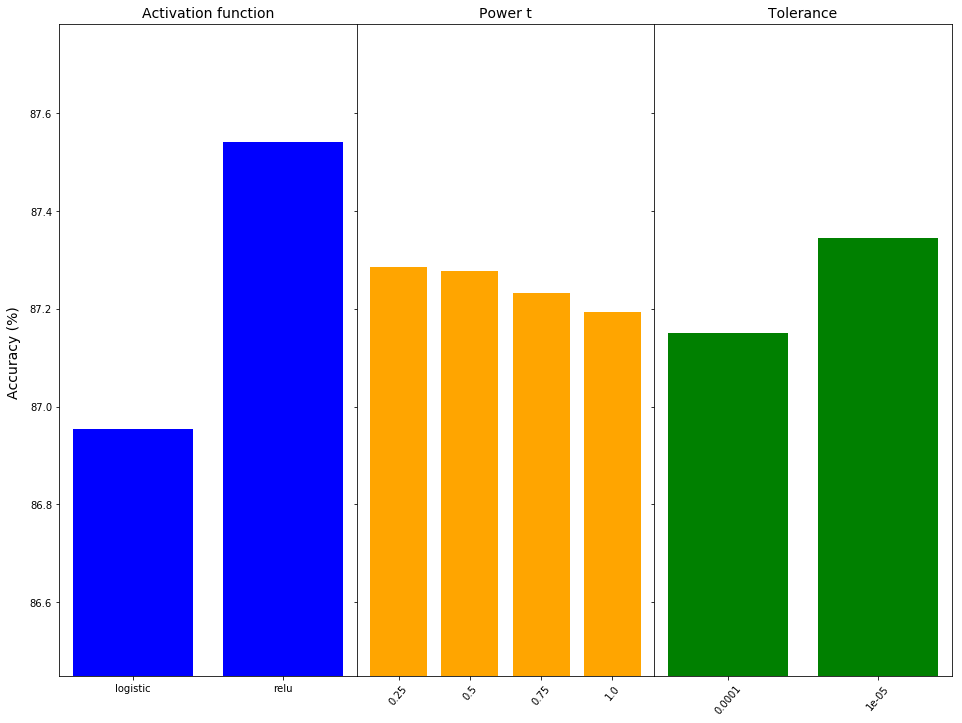

In [258]:
f, axs_acc = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(16, 12))
f.subplots_adjust(hspace=0, wspace=0)

axs_acc[0].set_title('Activation function', fontsize=14)
axs_acc[1].set_title('Power t', fontsize=14)
axs_acc[2].set_title('Tolerance', fontsize=14)

for it in range(len(its)):
    lines = list()

    # Activation function
    for af in range(len(afs)):
        axs_acc[0].bar(f'{afs[af]}',
                       height=addt_acc_nd[it, af, :, :].mean(),
                       color=colors[0])

    # axs_acc[0].set_title('Activation function', fontsize=14)
    axs_acc[0].set_xticklabels(afs)
    axs_acc[0].set_ylim(ymin=addt_ymin_acc, ymax=addt_ymax_acc)

    # Power t
    for pt in range(len(pts)):
        axs_acc[1].bar(f'{pts[pt]}',
                       height=addt_acc_nd[it, :, pt, :].mean(),
                       color=colors[1])

    # axs_acc[1].set_title('Power t', fontsize=14)
    axs_acc[1].set_xticklabels(pts, rotation=50)
    axs_acc[1].set_ylim(ymin=addt_ymin_acc, ymax=addt_ymax_acc)

    # Tolerance
    for tl in range(len(tls)):
        axs_acc[2].bar(f'{tls[tl]}',
                       height=addt_acc_nd[it, :, :, tl].mean(),
                       color=colors[2])

    # axs_acc[2].set_title('Tolerance', fontsize=14)
    axs_acc[2].set_xticklabels(tls, rotation=50)
    axs_acc[2].set_ylim(ymin=addt_ymin_acc, ymax=addt_ymax_acc)

#     patches = [mpatches.Patch(color=, label=)
#                for  in ]

# f.legend(handles=patches, ncol=5, loc=3, bbox_to_anchor=(0.055, 0.03))
# f.suptitle('Comparison between several classifiers and word2vec-model parameters (Mean accuracy)',
#            fontsize=16, y=0.95)

f.text(0.08,  0.50, 'Accuracy (%)', va='center', rotation='vertical', fontsize=14)

f.savefig(f'{addt_plot_out}/avg_acc.png')
f.show()

#### Summarized bar plot (Maximum Accuracy)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


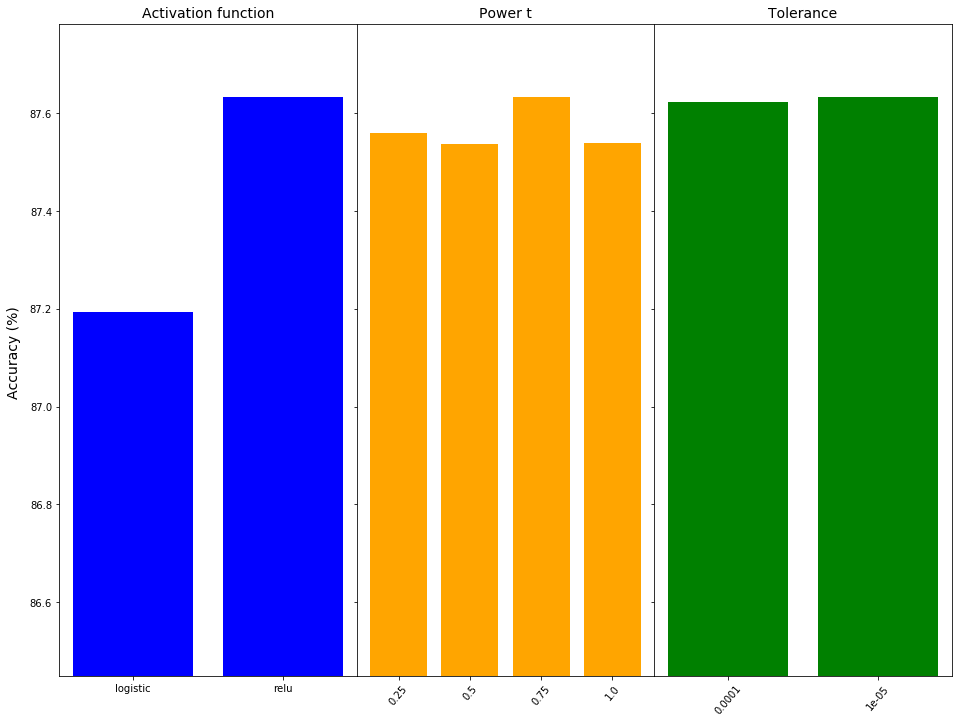

In [257]:
f, axs_acc = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(16, 12))
f.subplots_adjust(hspace=0, wspace=0)

axs_acc[0].set_title('Activation function', fontsize=14)
axs_acc[1].set_title('Power t', fontsize=14)
axs_acc[2].set_title('Tolerance', fontsize=14)

for it in range(len(its)):
    lines = list()

    # Activation function
    for af in range(len(afs)):
        axs_acc[0].bar(f'{afs[af]}',
                       height=addt_acc_nd[it, af, :, :].max(),
                       color=colors[0])

    # axs_acc[0].set_title('Activation function', fontsize=14)
    axs_acc[0].set_xticklabels(afs)
    axs_acc[0].set_ylim(ymin=addt_ymin_acc, ymax=addt_ymax_acc)

    # Power t
    for pt in range(len(pts)):
        axs_acc[1].bar(f'{pts[pt]}',
                       height=addt_acc_nd[it, :, pt, :].max(),
                       color=colors[1])

    # axs_acc[1].set_title('Power t', fontsize=14)
    axs_acc[1].set_xticklabels(pts, rotation=50)
    axs_acc[1].set_ylim(ymin=addt_ymin_acc, ymax=addt_ymax_acc)

    # Tolerance
    for tl in range(len(tls)):
        axs_acc[2].bar(f'{tls[tl]}',
                       height=addt_acc_nd[it, :, :, tl].max(),
                       color=colors[2])

    # axs_acc[2].set_title('Tolerance', fontsize=14)
    axs_acc[2].set_xticklabels(tls, rotation=50)
    axs_acc[2].set_ylim(ymin=addt_ymin_acc, ymax=addt_ymax_acc)

#     patches = [mpatches.Patch(color=, label=)
#                for  in ]

# f.legend(handles=patches, ncol=5, loc=3, bbox_to_anchor=(0.055, 0.03))
# f.suptitle('Comparison between several classifiers and word2vec-model parameters (Maximum accuracy)',
#            fontsize=16, y=0.95)

f.text(0.08,  0.50, 'Accuracy (%)', va='center', rotation='vertical', fontsize=14)

f.savefig(f'{addt_plot_out}/max_acc.png')
f.show()

##### Accuracy

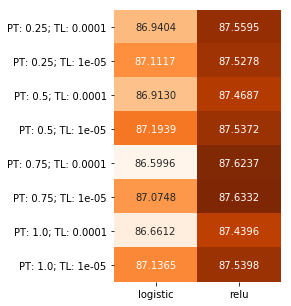

In [288]:
plt.figure(figsize=(3, 5))
seaborn.heatmap(pd.DataFrame([addt_acc_nd[0, af, :, :].flatten()
                              for af in range(len(afs))],
                             columns=[f'PT: {pt}; TL: {tl}' for pt in pts for tl in tls],
                             index=afs
                            ).transpose(), 
    annot=True, cmap='Oranges',
    fmt='.4f', cbar=0)
plt.show()

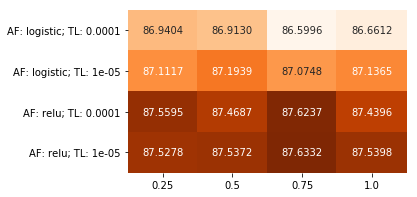

In [293]:
plt.figure(figsize=(5, 3))
seaborn.heatmap(pd.DataFrame([addt_acc_nd[0, :, pt, :].flatten()
                              for pt in range(len(pts))],
                             columns=[f'AF: {af}; TL: {tl}' for af in afs for tl in tls],
                             index=pts
                            ).transpose(), 
    annot=True, cmap='Oranges',
    fmt='.4f', cbar=0)
plt.show()

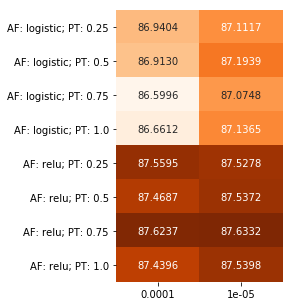

In [294]:
plt.figure(figsize=(3, 5))
seaborn.heatmap(pd.DataFrame([addt_acc_nd[0, :, :, tl].flatten()
                              for tl in range(len(tls))],
                             columns=[f'AF: {af}; PT: {pt}' for af in afs for pt in pts],
                             index=tls
                            ).transpose(), 
    annot=True, cmap='Oranges',
    fmt='.4f', cbar=0)
plt.show()

##### Time

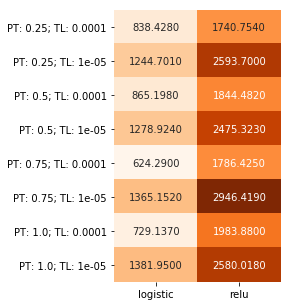

In [295]:
plt.figure(figsize=(3, 5))
seaborn.heatmap(pd.DataFrame([addt_tim_nd[0, af, :, :].flatten()
                              for af in range(len(afs))],
                             columns=[f'PT: {pt}; TL: {tl}' for pt in pts for tl in tls],
                             index=afs
                            ).transpose(), 
    annot=True, cmap='Oranges',
    fmt='.4f', cbar=0)
plt.show()

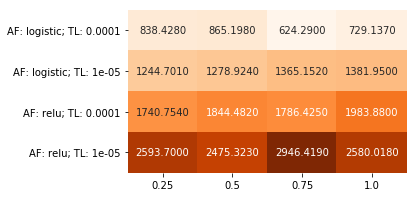

In [296]:
plt.figure(figsize=(5, 3))
seaborn.heatmap(pd.DataFrame([addt_tim_nd[0, :, pt, :].flatten()
                              for pt in range(len(pts))],
                             columns=[f'AF: {af}; TL: {tl}' for af in afs for tl in tls],
                             index=pts
                            ).transpose(), 
    annot=True, cmap='Oranges',
    fmt='.4f', cbar=0)
plt.show()

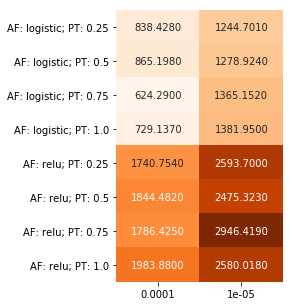

In [297]:
plt.figure(figsize=(3, 5))
seaborn.heatmap(pd.DataFrame([addt_tim_nd[0, :, :, tl].flatten()
                              for tl in range(len(tls))],
                             columns=[f'AF: {af}; PT: {pt}' for af in afs for pt in pts],
                             index=tls
                            ).transpose(), 
    annot=True, cmap='Oranges',
    fmt='.4f', cbar=0)
plt.show()

#### Confusion matrix; Precision; Recall; F<sub>1</sub>-score of the best additional classifier

In [400]:
conf_mtx(pd.DataFrame(addt_out_df['100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_1e-05tl']), t)

TP: 49877
FN: 8513
FP: 5929
TN: 52461

Accuracy: 87.6332

Precision: 0.8938
Recall: 0.8542
F1-score: 0.8735


(49877, 8513, 5929, 52461)

##### Time needed to evaluate

In [410]:
addt_tim_df.sum(axis=1)['100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_1e-05tl']

2946.419

<hr style="height: 5px;" />

### Ensemble methods

In [338]:
ens_acc_df = pd.concat([init_acc_df.mean(axis=1), addt_acc_df.mean(axis=1)])
ens_acc_df.sort_values(ascending=False).round(dec)

100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_1e-05tl     87.6332
100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_0.0001tl    87.6237
250ft_10mw_7cx_NN_1000iter                            87.5963
250ft_10mw_7cx_lm_NN_1000iter                         87.5946
250ft_25mw_7cx_NN_1000iter                            87.5835
500ft_10mw_5cx_NN_1000iter                            87.5792
100ft_25mw_5cx_NN_1000iter                            87.5595
100ft_10mw_5cx_lm_NN_1000iter_relu_0.25pt_0.0001tl    87.5595
100ft_10mw_7cx_NN_1000iter                            87.5587
500ft_10mw_7cx_NN_1000iter                            87.5569
500ft_10mw_5cx_lm_NN_1000iter                         87.5552
100ft_10mw_5cx_lm_NN_1000iter                         87.5492
250ft_25mw_5cx_NN_1000iter                            87.5458
500ft_10mw_3cx_NN_1000iter                            87.5415
100ft_10mw_5cx_lm_NN_1000iter_relu_1.0pt_1e-05tl      87.5398
250ft_25mw_3cx_NN_1000iter                            87.5390
100ft_10

In [298]:
ens_prob   = np.exp(ens_acc_df) / np.sum(np.exp(ens_acc_df))
ens_prob

100ft_10mw_3cx_ET_100est                                  0.001436
100ft_10mw_3cx_LogReg_1.00C                               0.000885
100ft_10mw_3cx_NB_1.00alpha                               0.000132
100ft_10mw_3cx_NN_1000iter                                0.004350
100ft_10mw_3cx_RF_100e                                    0.001677
100ft_10mw_3cx_lm_ET_100est                               0.001515
100ft_10mw_3cx_lm_LogReg_1.00C                            0.000953
100ft_10mw_3cx_lm_NB_1.00alpha                            0.000156
100ft_10mw_3cx_lm_NN_1000iter                             0.004327
100ft_10mw_3cx_lm_RF_100e                                 0.001677
100ft_10mw_3cx_lm_sm_ET_100est                            0.001369
100ft_10mw_3cx_lm_sm_LogReg_1.00C                         0.000842
100ft_10mw_3cx_lm_sm_NB_1.00alpha                         0.000126
100ft_10mw_3cx_lm_sm_NN_1000iter                          0.003809
100ft_10mw_3cx_lm_sm_RF_100e                              0.00

In [304]:
ens_out_df = pd.concat([init_out_df, addt_out_df.drop('i', axis=1)], axis=1)
ens_out_df.head()

,i,100ft_10mw_3cx_ET_100est,100ft_10mw_3cx_LogReg_1.00C,100ft_10mw_3cx_NB_1.00alpha,100ft_10mw_3cx_NN_1000iter,100ft_10mw_3cx_RF_100e,i,100ft_10mw_3cx_lm_ET_100est,100ft_10mw_3cx_lm_LogReg_1.00C,100ft_10mw_3cx_lm_NB_1.00alpha,...,100ft_10mw_5cx_lm_NN_1000iter_logistic_1.0pt_0.0001tl,100ft_10mw_5cx_lm_NN_1000iter_logistic_1.0pt_1e-05tl,100ft_10mw_5cx_lm_NN_1000iter_relu_0.25pt_0.0001tl,100ft_10mw_5cx_lm_NN_1000iter_relu_0.25pt_1e-05tl,100ft_10mw_5cx_lm_NN_1000iter_relu_0.5pt_0.0001tl,100ft_10mw_5cx_lm_NN_1000iter_relu_0.5pt_1e-05tl,100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_0.0001tl,100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_1e-05tl,100ft_10mw_5cx_lm_NN_1000iter_relu_1.0pt_0.0001tl,100ft_10mw_5cx_lm_NN_1000iter_relu_1.0pt_1e-05tl
0,1,False,True,False,False,False,1,False,True,False,...,True,False,False,True,True,False,True,True,True,False
1,6,True,True,True,True,True,6,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,9,True,True,True,True,True,9,True,True,True,...,True,True,True,True,False,True,True,False,False,True
3,7,False,False,False,False,False,7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7,True,True,True,True,True,7,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [312]:
ens_tim_df = pd.concat([init_tim_df.sum(axis=1), addt_tim_df.sum(axis=1)])
ens_tim_df

100ft_10mw_3cx_ET_100est                                    47.037
100ft_10mw_3cx_LogReg_1.00C                                 25.330
100ft_10mw_3cx_NB_1.00alpha                                  2.193
100ft_10mw_3cx_NN_1000iter                                1900.709
100ft_10mw_3cx_RF_100e                                     345.973
100ft_10mw_3cx_lm_ET_100est                                 48.152
100ft_10mw_3cx_lm_LogReg_1.00C                              22.573
100ft_10mw_3cx_lm_NB_1.00alpha                               2.190
100ft_10mw_3cx_lm_NN_1000iter                             1956.677
100ft_10mw_3cx_lm_RF_100e                                  356.724
100ft_10mw_3cx_lm_sm_ET_100est                              47.756
100ft_10mw_3cx_lm_sm_LogReg_1.00C                           23.821
100ft_10mw_3cx_lm_sm_NB_1.00alpha                            2.277
100ft_10mw_3cx_lm_sm_NN_1000iter                          2123.009
100ft_10mw_3cx_lm_sm_RF_100e                               341

#### Combining classifiers by randomly choosing an odd number of classifiers

In [314]:
data_df = pd.read_csv('../data/data.csv', index_col='Unnamed: 0')[['headlines', 'clickbait']]
display(data_df.head())

t = data_df['clickbait']

,headlines,clickbait
0,<number> indian <number> indian unrelatable te...,True
1,<number> best foods to eat when youre sick by ...,True
2,<number> best jobs in america,True
3,<number> jump street directors call jonah hill...,True
4,<number> jump street is one of the most self a...,True


#### Function to compose ensemble models

In [315]:
def compose_ensembles(acc, out, n_iter=1000, n_samples=[3], prob=None, replace=False):
    print(f'{n_samples} on {n_iter} iterations with{"" if replace else "out"} replacement...', end='\n\n')
    
    ens_list = list()

    for n_sampl in n_samples:
        print(f'{n_sampl:>2d} ...', end=' ')
        for i in range(n_iter):
            cls_sample = np.random.choice(acc.index, p=prob, replace=replace, size=n_sampl)
            y = (np.sum(out[cls_sample], axis=1) / n_sampl) >= 0.5
            ens_acc = (y == t).sum() / len(t) * 100
    #         print(cls_sample)
    #         print(ens_acc)
    #         print()
            ens_list.append(tuple([cls_sample, ens_acc]))
        print('Done!')

    return pd.DataFrame(ens_list, columns=['Classifiers', 'Accuracy (%)']).set_index('Classifiers')

##### ... with replacement

In [316]:
ens_df = compose_ensembles(ens_acc_df, ens_out_df, n_samples=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                           prob=ens_prob.values, replace=True)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21] on 1000 iterations with replacement...

 3 ... Done!
 5 ... Done!
 7 ... Done!
 9 ... Done!
11 ... Done!
13 ... Done!
15 ... Done!
17 ... Done!
19 ... Done!
21 ... Done!


In [317]:
ens_df.sort_values(by='Accuracy (%)', ascending=False).round(dec).head()

,Accuracy (%)
Classifiers,
"[500ft_10mw_5cx_NN_1000iter, 500ft_25mw_7cx_lm_sm_NN_1000iter, 250ft_25mw_3cx_lm_NN_1000iter, 250ft_10mw_3cx_NN_1000iter, 100ft_10mw_7cx_lm_sm_NN_1000iter, 100ft_25mw_5cx_NN_1000iter, 100ft_25mw_7cx_LogReg_1.00C, 100ft_25mw_3cx_NN_1000iter, 100ft_5mw_7cx_RF_100e, 500ft_25mw_3cx_lm_sm_NN_1000iter, 500ft_10mw_5cx_sm_NN_1000iter, 250ft_25mw_7cx_RF_100e, 100ft_25mw_3cx_sm_NN_1000iter, 100ft_10mw_7cx_lm_NN_1000iter, 100ft_10mw_3cx_lm_sm_NN_1000iter, 250ft_10mw_7cx_NN_1000iter, 500ft_10mw_3cx_sm_NN_1000iter, 250ft_5mw_3cx_lm_sm_NN_1000iter, 500ft_10mw_7cx_NN_1000iter]",88.0750
"[500ft_10mw_7cx_NN_1000iter, 500ft_5mw_5cx_NN_1000iter, 250ft_10mw_5cx_NN_1000iter, 250ft_10mw_5cx_sm_NN_1000iter, 500ft_5mw_7cx_lm_sm_ET_100est, 100ft_25mw_5cx_lm_sm_NN_1000iter, 100ft_5mw_7cx_NN_1000iter, 500ft_25mw_7cx_sm_NN_1000iter, 100ft_25mw_7cx_lm_NN_1000iter]",88.0639
"[100ft_10mw_7cx_NN_1000iter, 100ft_25mw_7cx_NN_1000iter, 250ft_10mw_5cx_lm_NN_1000iter, 500ft_25mw_3cx_NN_1000iter, 500ft_25mw_3cx_sm_NN_1000iter, 250ft_10mw_3cx_lm_NN_1000iter, 250ft_25mw_3cx_NN_1000iter, 500ft_10mw_7cx_lm_RF_100e, 250ft_25mw_5cx_lm_NN_1000iter]",88.0622
"[500ft_10mw_3cx_lm_NN_1000iter, 500ft_5mw_5cx_lm_sm_NN_1000iter, 250ft_10mw_3cx_sm_NN_1000iter, 100ft_10mw_7cx_NN_1000iter, 250ft_10mw_3cx_NN_1000iter, 100ft_5mw_5cx_lm_sm_ET_100est, 100ft_5mw_3cx_RF_100e, 500ft_25mw_7cx_NN_1000iter, 250ft_5mw_7cx_NN_1000iter, 250ft_10mw_3cx_lm_sm_NN_1000iter, 100ft_10mw_5cx_lm_NN_1000iter_relu_0.5pt_1e-05tl, 500ft_5mw_5cx_NN_1000iter, 100ft_25mw_7cx_sm_NN_1000iter, 250ft_5mw_5cx_sm_NN_1000iter, 100ft_25mw_5cx_sm_NN_1000iter]",88.0622
"[250ft_25mw_7cx_lm_sm_LogReg_1.00C, 500ft_5mw_7cx_sm_NN_1000iter, 250ft_25mw_7cx_lm_NN_1000iter, 250ft_10mw_5cx_lm_sm_NN_1000iter, 500ft_10mw_7cx_sm_NN_1000iter, 100ft_5mw_7cx_lm_NN_1000iter, 500ft_25mw_3cx_sm_NN_1000iter, 500ft_25mw_3cx_sm_ET_100est, 250ft_5mw_3cx_NN_1000iter, 250ft_10mw_7cx_NN_1000iter, 500ft_10mw_3cx_NB_1.00alpha, 100ft_5mw_5cx_NN_1000iter, 250ft_25mw_5cx_NN_1000iter, 100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_1e-05tl, 100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_1e-05tl, 500ft_25mw_7cx_NN_1000iter, 250ft_10mw_3cx_lm_sm_NN_1000iter, 100ft_5mw_7cx_lm_NN_1000iter, 100ft_25mw_3cx_lm_NN_1000iter]",88.0545


##### ... without replacement

In [318]:
ens_df = compose_ensembles(ens_acc_df, ens_out_df, n_samples=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                           prob=ens_prob.values, replace=False)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21] on 1000 iterations without replacement...

 3 ... Done!
 5 ... Done!
 7 ... Done!
 9 ... Done!
11 ... Done!
13 ... Done!
15 ... Done!
17 ... Done!
19 ... Done!
21 ... Done!


In [319]:
ens_df.sort_values(by='Accuracy (%)', ascending=False).round(dec).head()

,Accuracy (%)
Classifiers,
"[100ft_10mw_5cx_lm_NN_1000iter_relu_0.25pt_1e-05tl, 250ft_25mw_5cx_NN_1000iter, 500ft_25mw_7cx_NN_1000iter, 250ft_5mw_3cx_sm_NN_1000iter, 100ft_25mw_7cx_lm_NN_1000iter, 100ft_10mw_5cx_sm_NN_1000iter, 500ft_5mw_3cx_lm_sm_NN_1000iter, 100ft_25mw_3cx_sm_NN_1000iter, 500ft_5mw_7cx_lm_sm_NN_1000iter, 250ft_25mw_7cx_NN_1000iter, 100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_0.0001tl, 500ft_5mw_5cx_lm_NN_1000iter, 100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_1e-05tl]",88.0784
"[100ft_10mw_5cx_NN_1000iter, 500ft_10mw_5cx_RF_100e, 250ft_10mw_7cx_lm_sm_NN_1000iter, 500ft_25mw_7cx_lm_sm_NN_1000iter, 500ft_25mw_5cx_NN_1000iter, 500ft_25mw_5cx_lm_sm_ET_100est, 100ft_25mw_7cx_NN_1000iter, 100ft_25mw_3cx_NN_1000iter, 100ft_5mw_7cx_sm_NN_1000iter, 250ft_10mw_7cx_sm_NN_1000iter, 100ft_25mw_5cx_lm_sm_NN_1000iter, 250ft_25mw_5cx_lm_NN_1000iter, 250ft_25mw_7cx_sm_NN_1000iter, 250ft_25mw_3cx_lm_NN_1000iter, 100ft_10mw_7cx_lm_NN_1000iter]",88.0724
"[250ft_10mw_5cx_lm_sm_NN_1000iter, 100ft_5mw_3cx_NN_1000iter, 100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_1e-05tl, 500ft_5mw_3cx_sm_NN_1000iter, 250ft_10mw_5cx_sm_NN_1000iter, 250ft_25mw_5cx_lm_NN_1000iter, 250ft_10mw_3cx_NN_1000iter, 100ft_25mw_5cx_sm_NN_1000iter, 500ft_10mw_3cx_lm_NN_1000iter]",88.0699
"[100ft_10mw_5cx_NN_1000iter, 250ft_5mw_3cx_sm_NN_1000iter, 250ft_25mw_7cx_NN_1000iter, 500ft_10mw_3cx_lm_sm_NN_1000iter, 500ft_5mw_3cx_lm_NN_1000iter, 500ft_25mw_7cx_lm_NN_1000iter, 250ft_10mw_7cx_lm_NN_1000iter]",88.0570
"[250ft_5mw_3cx_sm_NN_1000iter, 500ft_25mw_5cx_sm_ET_100est, 100ft_10mw_3cx_lm_NN_1000iter, 500ft_10mw_7cx_sm_NN_1000iter, 500ft_25mw_7cx_sm_NN_1000iter, 250ft_25mw_7cx_NN_1000iter, 500ft_25mw_5cx_sm_NN_1000iter, 250ft_10mw_3cx_lm_sm_NN_1000iter, 100ft_5mw_3cx_lm_sm_NN_1000iter, 500ft_25mw_5cx_NN_1000iter, 100ft_25mw_7cx_lm_sm_ET_100est, 250ft_5mw_7cx_sm_NN_1000iter, 250ft_10mw_5cx_lm_NN_1000iter, 500ft_25mw_5cx_lm_NN_1000iter, 500ft_5mw_5cx_NN_1000iter, 100ft_25mw_3cx_NN_1000iter, 500ft_5mw_7cx_NN_1000iter, 100ft_10mw_7cx_lm_NN_1000iter, 500ft_25mw_7cx_sm_RF_100e]",88.0562


<hr style="height: 5px" />

#### Confusion matrix; Precision; Recall; F<sub>1</sub>-score of the best overall classifier

In [414]:
ens_cls = ['100ft_10mw_5cx_lm_NN_1000iter_relu_0.25pt_1e-05tl',
           '250ft_25mw_5cx_NN_1000iter',
           '500ft_25mw_7cx_NN_1000iter',
           '250ft_5mw_3cx_sm_NN_1000iter',
           '100ft_25mw_7cx_lm_NN_1000iter',
           '100ft_10mw_5cx_sm_NN_1000iter',
           '500ft_5mw_3cx_lm_sm_NN_1000iter',
           '100ft_25mw_3cx_sm_NN_1000iter',
           '500ft_5mw_7cx_lm_sm_NN_1000iter',
           '250ft_25mw_7cx_NN_1000iter',
           '100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_0.0001tl',
           '500ft_5mw_5cx_lm_NN_1000iter',
           '100ft_10mw_5cx_lm_NN_1000iter_relu_0.75pt_1e-05tl']

conf_mtx(ens_out_df[ens_cls], t)

TP: 49824
FN: 8566
FP: 5356
TN: 53034

Accuracy: 88.0784

Precision: 0.9029
Recall: 0.8533
F1-score: 0.8774


(49824, 8566, 5356, 53034)

##### Time needed to evaluate (assumption: all the classifiers can run in parallel)

In [411]:
tim_df = pd.concat([init_tim_df.sum(axis=1), addt_tim_df.sum(axis=1)])

In [416]:
tim_df[ens_cls].max()

10151.805